In [113]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from ift6758.utilities.game_utilities import get_goals_per_game
from ift6758.visualizations.advanced_visualizations import generate_shot_map_matrix
from scipy.ndimage import gaussian_filter

sns.set()

In [114]:
plays_df = pd.read_csv("./data/extracted/shot_goal_20161012_20210707.csv")

In [115]:
season = 20162017
team = 'Colorado Avalanche'
bin_size = 1

global_matrix = generate_shot_map_matrix(plays_df.copy(), bin_size=bin_size, season_filter=season)
global_goals_per_game = get_goals_per_game(plays_df.copy(), season_filter=season)
team_matrix = generate_shot_map_matrix(plays_df.copy(), bin_size=bin_size, team_filter=team, season_filter=season)
team_goals_per_game = get_goals_per_game(plays_df.copy(), team_filter=team, season_filter=season)

print(global_matrix.sum().sum())
print(global_goals_per_game)
print(team_matrix.sum().sum())
print(team_goals_per_game)

difference_matrix = np.subtract(team_matrix.align(global_matrix, fill_value=0)[0], global_matrix)
# Sort by decreasing distance from center ice so center ice appears at the bottom of the graph
difference_matrix.sort_index(ascending=False, kind='mergesort', inplace=True)

29.887243735763096
2.7145026575550495
27.646341463414632
2.0121951219512195


<AxesSubplot:xlabel='Distance from center of rink (ft)', ylabel='Distance from center ice to goal (ft)'>

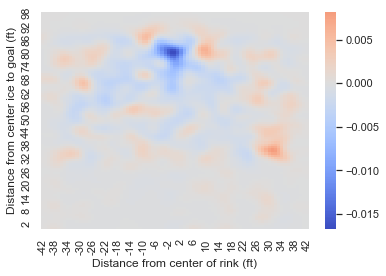

In [116]:
df3_smooth = gaussian_filter(difference_matrix, sigma=2, order=0)
difference_matrix_smooth = pd.DataFrame(data=df3_smooth, index=difference_matrix.index, columns=difference_matrix.columns)
sns.heatmap(difference_matrix_smooth, cmap ="coolwarm", center=0)